***Mental Fitness Tracker***

***Importing the necessary libraries***

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

***Loading The Datasets***

In [ ]:
dataset_1 = pd.read_csv('/content/prevalence-by-mental-and-substance-use-disorder.csv')
dataset_2 = pd.read_csv('/content/mental-and-substance-use-as-share-of-disease.csv')

***Merging The Two Datasets***

In [ ]:
merged_dataset = pd.merge(dataset_1, dataset_2)
print(merged_dataset.head(10))

***Data Cleaning***

In [ ]:
merged_dataset.isnull().sum()
merged_dataset.drop('Code',axis=1,inplace=True)
merged_dataset.size
merged_dataset.shape

(6840, 10)

***Altering The Coloumn Names***

In [ ]:
merged_dataset.set_axis(['Country','Year','Schizophrenia', 'Bipolar_disorder', 'Eating_disorder','Anxiety','drug_usage','depression','alcohol','mental_fitness'], axis='columns', inplace=True)

***Let The Analysis Begin***

In [ ]:
# Visualizing mental fitness indicators across countries
fig = px.bar(merged_dataset, x='Country', y='mental_fitness', color='Year', barmode='group')
fig.update_layout(title='Mental Fitness Across Countries', xaxis_title='Country', yaxis_title='Mental Fitness')
fig.show()
plt.figure(figsize=(12,6))
sns.heatmap(merged_dataset.corr(),annot=True,cmap='Blues')
plt.plot()

[]

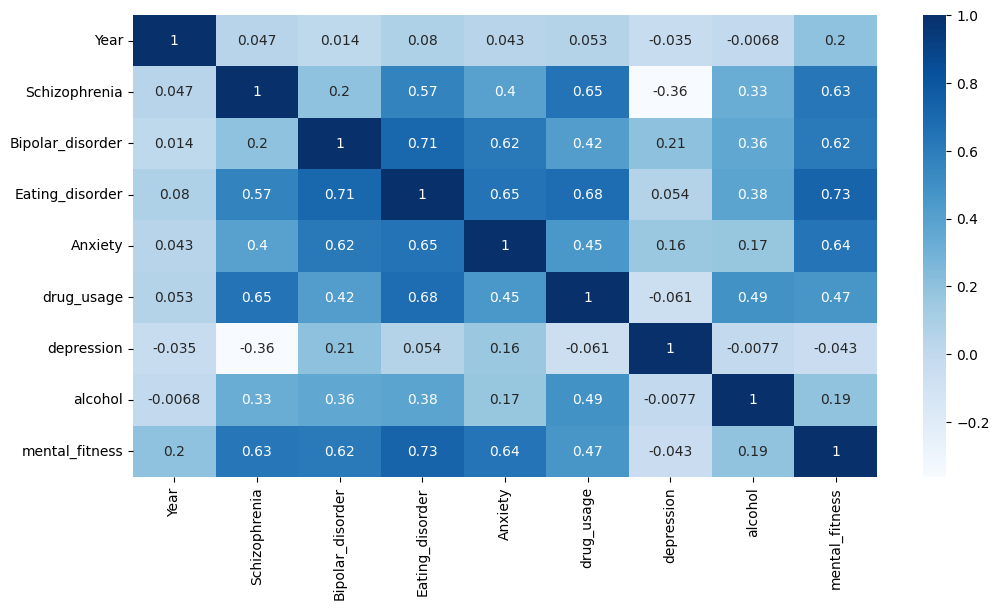

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(merged_dataset.corr(),annot=True,cmap='Blues')
plt.plot()

***Multiple linear regression allows you to model the relationship between the features and mental fitness by estimating the coefficients that quantify their influence.***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare the data
X = merged_dataset[['Schizophrenia', 'Bipolar_disorder', 'Eating_disorder', 'Anxiety', 'drug_usage', 'depression', 'alcohol']]
y = merged_dataset['mental_fitness']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Predict on the test set
y_pred = regression_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = regression_model.score(X_test, y_test)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)


Mean Squared Error: 1.506172546193809
Root Mean Squared Error: 1.2272622157443815
R-squared: 0.7038976826127907


In regression, we typically use evaluation metrics like mean squared error (MSE), root mean squared error (RMSE), or R-squared to assess the model's performance.

In [ ]:
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
r_squared = regression_model.score(X_test, y_test)
boosted_model = GradientBoostingRegressor()
boosted_model.fit(X_train, y_train)
y_pred_boosted = boosted_model.predict(X_test)
r_squared_boosted = r2_score(y_test, y_pred_boosted)
print("Baseline Model R-squared:", r_squared)
print("Boosted Model R-squared:", r_squared_boosted)

Baseline Model R-squared: 0.7038976826127907
Boosted Model R-squared: 0.917716015052443


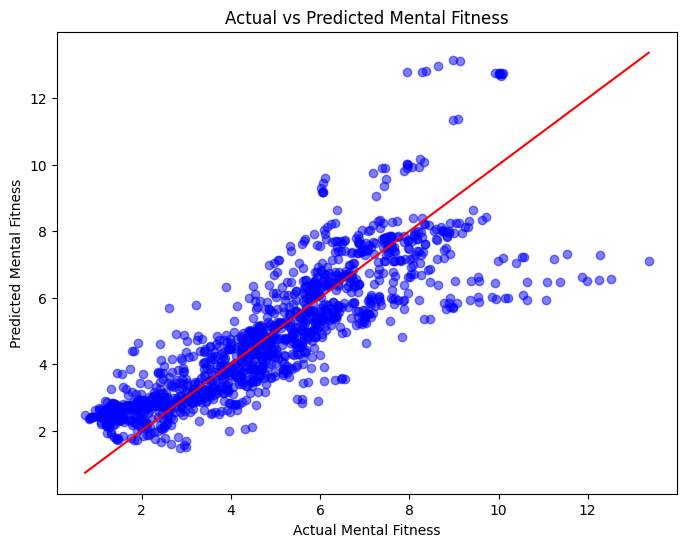

In [ ]:
import matplotlib.pyplot as plt

# Assume the trained regression_model and X_test, y_test are already available

# Predict on the test set
y_pred = regression_model.predict(X_test)

# Plot the graph
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.xlabel('Actual Mental Fitness')
plt.ylabel('Predicted Mental Fitness')
plt.title('Actual vs Predicted Mental Fitness')
plt.show()


In [ ]:

# User input
country = input("Enter Your country Name: ")
year = int(input("Enter the Year: "))
schi = float(input("Enter your Schizophrenia rate in % (if not available, enter 0, ex: 6): "))
bipo_dis = float(input("Enter your Bipolar disorder rate in % (if not available, enter 0, ex: 12): "))
eat_dis = float(input("Enter your Eating disorder rate in % (if not available, enter 0, ex: 22): "))
anx = float(input("Enter your Anxiety rate in % (if not available, enter 0, ex: 48): "))
drug_use = float(input("Enter your Drug Usage rate per year in % (if not available, enter 0, ex: 3): "))
depr = float(input("Enter your Depression rate in % (if not available, enter 0, ex: 5): "))
alch = float(input("Enter your Alcohol Consuming rate per year in % (if not available, enter 0, ex: 7): "))

# Predict using boosted model
input_data = np.array([[schi, bipo_dis, eat_dis, anx, drug_use, depr, alch]])
prediction_boosted = boosted_model.predict(input_data)


print("Prediction using Boosted Model:")
print("Your Mental Fitness is {}%".format(prediction_boosted*10))

Enter Your country Name: India
Enter the Year: 2001
Enter your Schizophrenia rate in % (if not available, enter 0, ex: 6): 6
Enter your Bipolar disorder rate in % (if not available, enter 0, ex: 12): 12
Enter your Eating disorder rate in % (if not available, enter 0, ex: 22): 22
Enter your Anxiety rate in % (if not available, enter 0, ex: 48): 48
Enter your Drug Usage rate per year in % (if not available, enter 0, ex: 3): 3
Enter your Depression rate in % (if not available, enter 0, ex: 5): 5
Enter your Alcohol Consuming rate per year in % (if not available, enter 0, ex: 7): 7
Prediction using Boosted Model:
Your Mental Fitness is [92.20758062]%


In [ ]:
# User input
country = input("Enter Your country Name: ")
year = int(input("Enter the Year: "))
schi = float(input("Enter your Schizophrenia rate in % (if not available, enter 0, ex: 6): "))
bipo_dis = float(input("Enter your Bipolar disorder rate in % (if not available, enter 0, ex: 12): "))
eat_dis = float(input("Enter your Eating disorder rate in % (if not available, enter 0, ex: 22): "))
anx = float(input("Enter your Anxiety rate in % (if not available, enter 0, ex: 48): "))
drug_use = float(input("Enter your Drug Usage rate per year in % (if not available, enter 0, ex: 3): "))
depr = float(input("Enter your Depression rate in % (if not available, enter 0, ex: 5): "))
alch = float(input("Enter your Alcohol Consuming rate per year in % (if not available, enter 0, ex: 7): "))

# Predict using Random Forest model
input_data_rf = np.array([[schi, bipo_dis, eat_dis, anx, drug_use, depr, alch]])
prediction_rf = forest_model.predict(input_data_rf)

print("Prediction using Random Forest Model:")
print("Your Mental Fitness is {}%".format(prediction_rf*10))


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, BayesianRidge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
df1 = pd.read_csv('mental-and-substance-use-as-share-of-disease.csv')
df2 = pd.read_csv('prevalence-by-mental-and-substance-use-disorder.csv')
numeric_columns = df1.select_dtypes(include=[np.number]).columns
df1[numeric_columns] = df1[numeric_columns].fillna(df1[numeric_columns].mean())

numeric_columns = df2.select_dtypes(include=[np.number]).columns
df2[numeric_columns] = df2[numeric_columns].fillna(df2[numeric_columns].mean())
df1['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'] = df1['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'].astype(float)
df2['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized'] = df2['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized'].astype(float)
df2['Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized'] = df2['Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized'].astype(float)
df2['Eating disorders (share of population) - Sex: Both - Age: Age-standardized'] = df2['Eating disorders (share of population) - Sex: Both - Age: Age-standardized'].astype(float)
df2['Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized'] = df2['Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized'].astype(float)
df2['Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)'] = df2['Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)'].astype(float)
df2['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'] = df2['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'].astype(float)
df2['Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)'] = df2['Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)'].astype(float)
merged_df = pd.merge(df1, df2, on=['Entity', 'Code', 'Year'])
X = merged_df[['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Eating disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)',
               'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)']]

y = merged_df['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Compute the correlation matrix
corr_matrix = merged_df[['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
                         'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
                         'Eating disorders (share of population) - Sex: Both - Age: Age-standardized',
                         'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
                         'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)',
                         'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
                         'Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)',
                         'DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'
                        ]].corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Diseases and Mental Fitness')
# plt.xticks(rotation=0)
# plt.yticks(rotation=0)
plt.show()
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Create a dictionary to store the model performance
model_performance = {}

# Ridge Regression
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train, y_train)
ridge_y_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)
model_performance['1. Ridge Regression'] = {'MSE': ridge_mse, 'R-squared': ridge_r2}

# Lasso Regression
lasso_model = Lasso(alpha=0.5)
lasso_model.fit(X_train, y_train)
lasso_y_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)
model_performance['2. Lasso Regression'] = {'MSE': lasso_mse, 'R-squared': lasso_r2}

# Elastic Net Regression
elastic_net_model = ElasticNet(alpha=0.5, l1_ratio=0.5)
elastic_net_model.fit(X_train, y_train)
elastic_net_y_pred = elastic_net_model.predict(X_test)
elastic_net_mse = mean_squared_error(y_test, elastic_net_y_pred)
elastic_net_r2 = r2_score(y_test, elastic_net_y_pred)
model_performance['3. Elastic Net Regression'] = {'MSE': elastic_net_mse, 'R-squared': elastic_net_r2}

# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)
X_test_poly = poly_features.transform(X_test)
poly_y_pred = poly_model.predict(X_test_poly)
poly_mse = mean_squared_error(y_test, poly_y_pred)
poly_r2 = r2_score(y_test, poly_y_pred)
model_performance['4. Polynomial Regression'] = {'MSE': poly_mse, 'R-squared': poly_r2}

# Decision Tree Regression
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_y_pred = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_y_pred)
tree_r2 = r2_score(y_test, tree_y_pred)
model_performance['5. Decision Tree Regression'] = {'MSE': tree_mse, 'R-squared': tree_r2}

# Random Forest Regression
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
forest_y_pred = forest_model.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_y_pred)
forest_r2 = r2_score(y_test, forest_y_pred)
model_performance['6. Random Forest Regression'] = {'MSE': forest_mse, 'R-squared': forest_r2}

# SVR (Support Vector Regression)
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_y_pred = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)
model_performance['7. Support Vector Regression'] = {'MSE': svr_mse, 'R-squared': svr_r2}

# XGBoost Regression
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
model_performance['8. XGBoost Regression'] = {'MSE': xgb_mse, 'R-squared': xgb_r2}

# K-Nearest Neighbors Regression
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)
model_performance['9. K-Nearest Neighbors Regression'] = {'MSE': knn_mse, 'R-squared': knn_r2}

# Bayesian Regression
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train, y_train)
bayesian_y_pred = bayesian_model.predict(X_test)
bayesian_mse = mean_squared_error(y_test, bayesian_y_pred)
bayesian_r2 = r2_score(y_test, bayesian_y_pred)
model_performance['10. Bayesian Regression'] = {'MSE': bayesian_mse, 'R-squared': bayesian_r2}

# Neural Network Regression
nn_model = MLPRegressor(max_iter=1000)
nn_model.fit(X_train, y_train)
nn_y_pred = nn_model.predict(X_test)
nn_mse = mean_squared_error(y_test, nn_y_pred)
nn_r2 = r2_score(y_test, nn_y_pred)
model_performance['11. Neural Network Regression'] = {'MSE': nn_mse, 'R-squared': nn_r2}

# Gradient Boosting Regression
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)
model_performance['12. Gradient Boosting Regression'] = {'MSE': gb_mse, 'R-squared': gb_r2}

# Print model performance
for model, performance in model_performance.items():
    print(f"Model: {model}")
    print("   Mean Squared Error (MSE):", performance['MSE'])
    print("   R-squared Score:", performance['R-squared'])
    print()
# User input

schi = float(input("Enter your Schizophrenia rate in % (if not available, enter 0, ex: 6): "))
bipo_dis = float(input("Enter your Bipolar disorder rate in % (if not available, enter 0, ex: 12): "))
eat_dis = float(input("Enter your Eating disorder rate in % (if not available, enter 0, ex: 22): "))
anx = float(input("Enter your Anxiety rate in % (if not available, enter 0, ex: 48): "))
drug_use = float(input("Enter your Drug Usage rate per year in % (if not available, enter 0, ex: 3): "))
depr = float(input("Enter your Depression rate in % (if not available, enter 0, ex: 5): "))
alch = float(input("Enter your Alcohol Consuming rate per year in % (if not available, enter 0, ex: 7): "))

# Predict using Random Forest model
input_data_rf = np.array([[schi, bipo_dis, eat_dis, anx, drug_use, depr, alch]])
prediction_rf = forest_model.predict(input_data_rf)

print("Prediction using Random Forest Model:")
print("Your Mental Fitness is {}%".format(prediction_rf*10))


In [ ]:
i need to deploy this project using the : flask create a form that takes these inputs all those features : all those features :